In [1062]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# 1 Precision-Recall Curves

In [1063]:
from sklearn.datasets import load_digits


digits = load_digits()

print(digits.keys())

data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


## 1.1 Euclidean Distance

In [1064]:


def dist_vec(query: np.ndarray, dataset: np.ndarray) -> np.ndarray:
    """Calculate the euclidean distance between all instances in the training and test set

    Using numpy vectorized functions
    
    Parameters
    ----------
    query : numpy.ndarray
        2D array of the size N x D, with D pixels per image and N instances
        in the training set.

    dataset : np.ndarray
        2D array of the size M x D, with D pixels per image and M instances 
        in the test set.

    Returns
    -------
    distances : np.ndarray
        2D array of the size N x M. 
        The euclidean distance between all instances.

    """
    AB = np.dot(dataset, np.transpose(query)) 
    AA = np.sum(np.square(dataset), axis=1)
    BB = np.sum(np.square(query), axis=1) 
    dist_matrix = np.sqrt(np.transpose(BB - 2 * AB) + AA) 
    return dist_matrix


In [1065]:
D: np.ndarray = dist_vec(data, data)

S = np.argsort(D, axis=1)


In [1066]:


def true_false_positives(S: np.ndarray, query_labels: np.ndarray, dataset_labels: np.ndarray):
    _i, _m = S.shape
    tps = []
    fps = []
    
    for i in range(_i):
        S_i = S[i]
        is_positive = query_labels[i] == dataset_labels[S_i]
        tps.append(np.cumsum(is_positive))
        fps.append(np.cumsum(np.logical_not(is_positive)))
    return np.array(tps).reshape((_i, -1)), np.array(fps).reshape((_i, -1))


TP, FP = true_false_positives(S, target, target)
N_i = TP[:, -1]

precision = TP / (TP+FP)

recall = TP / N_i


     AUC  k
0.939261  0
0.460951  1
0.614456  2
0.640516  3
0.693937  4
0.595976  5
0.880960  6
0.693171  7
0.445930  8
0.486551  9


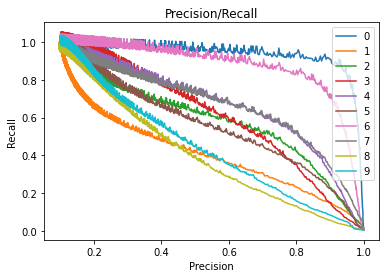

In [1067]:
AUCs = []
for k in range(10):
    avg_prec = np.mean(precision[target == k], axis=0)
    avg_recall = np.mean(recall[target == k], axis=0)

    plt.plot(avg_prec, avg_recall, label=k)

    AUCs.append(np.trapz(avg_prec, avg_recall))


df = pd.DataFrame(
    {
        "AUC": AUCs,
        "k": list(range(10))
    }
)
print(df.to_string(index=False))


plt.title(r"Precision/Recall")
plt.xlabel("Precision")
plt.ylabel("Recall")
_ = plt.legend()


 AUC - Gain  k
   0.996429  0
   0.899048  1
   0.940279  2
   0.950290  3
   0.957373  4
   0.945830  5
   0.991328  6
   0.971743  7
   0.885183  8
   0.886285  9


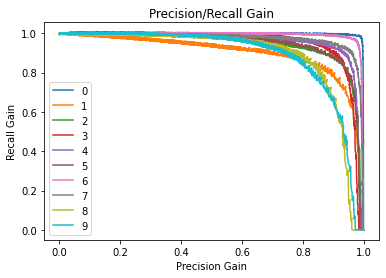

In [1068]:
N_frac = len(data) / N_i

precision_gain = ( N_frac - ( 1 / precision ) ) / ( N_frac - 1 )
precision_gain[precision_gain < 0] = 0

recall_gain = ( N_frac - 1 / recall ) / ( N_frac - 1 )
recall_gain[recall_gain < 0] = 0

AUCs = []
for k in range(10):
    avg_prec = np.mean(precision_gain[target == k], axis=0)
    avg_recall = np.mean(recall_gain[target == k], axis=0)

    plt.plot(avg_prec, avg_recall, label=k)

    AUCs.append(np.trapz(avg_prec, avg_recall))


df = pd.DataFrame(
    {
        "AUC - Gain": AUCs,
        "k": list(range(10))
    }
)
print(df.to_string(index=False))


plt.title(r"Precision/Recall Gain")
plt.xlabel("Precision Gain")
plt.ylabel("Recall Gain")
_ = plt.legend()


### Differences

In the plot `Precision/Recall` one can see how the classifier performs for the different classes. This does not allow for good comparison with other classifiers, it is only good for analysing the classifier for the given data set.

The plot `Precision/Recall Gain` compares the classifier from before with the naive classifier, aka guessing. This allows for better comparison with other classifiers.

## 1.2 Hand-Crafted Distance

In [1069]:
...
                                                                                             

Ellipsis

# 2 Red Cards Study

## 2.1 Loading and Cleaning the Data

Size of DF before dropping (rater1 and rater2) == NaN:
146028
Size of DF after dropping (rater1 and rater2) == NaN:
124621


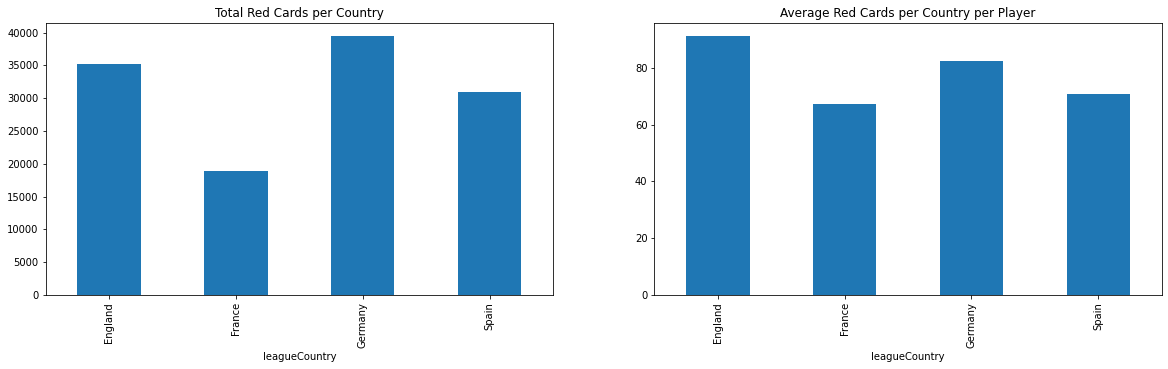

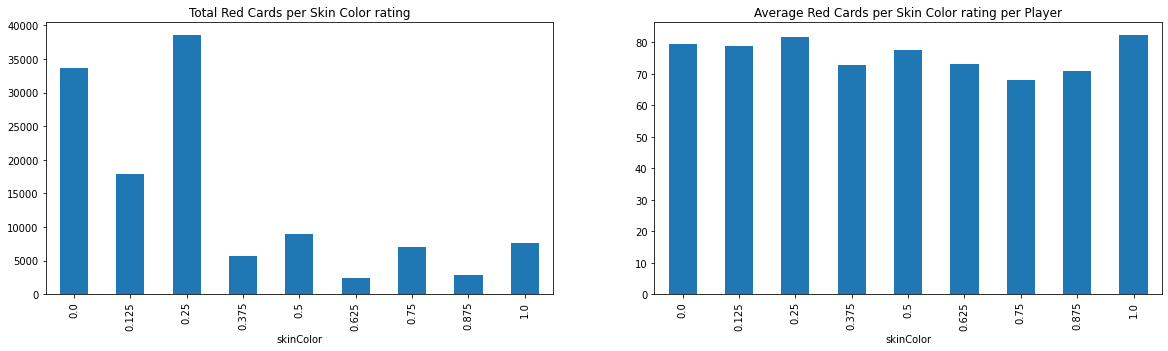

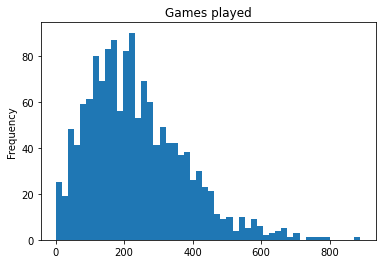

,playerShort,skinColor,height,weight,age,victorieRatio,tieRatio,defeatRatio,goalRatio,redCardRatio,...,position_Left Fullback,position_Left Midfielder,position_Left Winger,position_Right Fullback,position_Right Midfielder,position_Right Winger,leagueCountry_England,leagueCountry_France,leagueCountry_Germany,leagueCountry_Spain
0,aaron-hughes,0.125,182.0,71.0,34.0,0.377953,0.274016,0.348031,0.012598,0.000000,...,0,0,0,0,0,0,1,0,0,0
1,aaron-hunt,0.125,183.0,73.0,27.0,0.423780,0.213415,0.362805,0.179878,0.003049,...,0,0,0,0,0,0,0,0,1,0
2,aaron-lennon,0.250,165.0,63.0,26.0,0.486618,0.233577,0.279805,0.075426,0.000000,...,0,0,0,0,1,0,1,0,0,0
3,aaron-ramsey,0.000,178.0,76.0,23.0,0.569170,0.166008,0.264822,0.154150,0.003953,...,0,0,0,0,0,0,1,0,0,0
4,abdelhamid-el-kaoutari,0.250,180.0,73.0,23.0,0.330645,0.322581,0.346774,0.008065,0.048387,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,zoltan-gera,0.250,181.0,76.0,34.0,0.376000,0.253333,0.370667,0.173333,0.005333,...,0,0,1,0,0,0,1,0,0,0
1414,zoltan-stieber,0.000,175.0,67.0,25.0,0.335714,0.264286,0.400000,0.192857,0.000000,...,0,1,0,0,0,0,0,0,1,0
1415,zoumana-camara,0.875,182.0,76.0,34.0,0.378866,0.301546,0.319588,0.018041,0.015464,...,0,0,0,0,0,0,0,1,0,0
1416,zubikarai,0.000,185.0,84.0,29.0,0.297872,0.319149,0.382979,0.000000,0.042553,...,0,0,0,0,0,0,0,0,0,1


In [1070]:
df = pd.read_csv("CrowdstormingDataJuly1st.csv")

irrelevant_keys = ["player",
                   "photoID",
                   "refCountry",
                   "Alpha_3",
                   "meanIAT",
                   "nIAT",
                   "seIAT",
                   "meanExp",
                   "nExp",
                   "seExp",
                   "yellowCards"
                   ]  # drop these
df = df.drop(irrelevant_keys, axis=1)
# display(df.head())

# calculate age
date_end = pd.Timestamp("01.01.2014")
df["birthday"] = pd.to_datetime(df["birthday"])
df["age"] = (date_end - df['birthday']).astype("timedelta64[Y]")

# now we can drop the birthday
df = df.drop("birthday", axis=1)
# display(df.head())


# only a small portion of data has rater1 and 2 as NaN
# So we can just drop them and make life easier

# Size before:
print(f"Size of DF before dropping (rater1 and rater2) == NaN:\n{df.shape[0]}")
df = df.dropna(subset=["rater1", "rater2"], how="all")
# Size after
print(f"Size of DF after dropping (rater1 and rater2) == NaN:\n{df.shape[0]}")


# calulate mean skin color depending on the rater1 and rater2 values
df["skinColor"] = df[["rater1", "rater2"]].mean(axis=1, skipna=True)
# now drop rater1 and rater2
df = df.drop(["rater1", "rater2"], axis=1)


fig, ax = plt.subplots(1, 2)
fig.set_size_inches(20, 5)
red_cards_per_country = df.groupby("leagueCountry").count()["redCards"]
red_cards_per_country.plot.bar(title="Total Red Cards per Country", ax=ax[0])
red_cards_per_country = red_cards_per_country / \
    df.groupby("leagueCountry")["playerShort"].nunique()
red_cards_per_country.plot.bar(
    title="Average Red Cards per Country per Player", ax=ax[1])
plt.show()

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(20, 5)
red_cards_per_color = df.groupby("skinColor").count()["redCards"]
red_cards_per_color.plot.bar(
    title="Total Red Cards per Skin Color rating", ax=ax[0])
red_cards_per_color = red_cards_per_color / \
    df.groupby("skinColor")["playerShort"].nunique()
red_cards_per_color.plot.bar(
    title="Average Red Cards per Skin Color rating per Player", ax=ax[1])
plt.show()


# drop referees that were present less than one full game, one game usually has 22 players
df = df[df.groupby("refNum")["refNum"].transform("count")>=22]
df = df.drop("refNum", axis=1)  # now drop the referee

#display(df)


# If any of the following features is NaN, we drop them.
# display(df[df.groupby("playerShort")["position"].transform("nunique") < 1])
df = df.dropna(subset=["playerShort", "skinColor", "club", "position", "height", "weight", "age", "leagueCountry"], how="any")

# Group and sum up some relevant features, like sum of goals
df = df.groupby(["playerShort", "skinColor", "club", "position", "height", "weight", "age", "leagueCountry"]).sum().reset_index()



###############################
# Ratio                       #
###############################
# Create new Ratio features, depending on games played
for ratio in ["victories", "ties","defeats", "goals"]:
    df[f"{ratio[:-1]}Ratio"] = df[ratio] / df["games"]
    df = df.drop(ratio, axis=1)  # drop the old features, as we only want the ratios
df["redCardRatio"] = (df["redCards"] + df["yellowReds"]) / df["games"]
df = df.drop(["redCards", "yellowReds"], axis=1)

df["games"].plot.hist(bins=50, title="Games played")
plt.show()
# Usually a red card occurs only once every 5 games or so
# https://runrepeat.com/red-card-study
# Thus we decide to remove players with less than 5 games, because of noise

df = df[df.groupby("playerShort")["games"].transform("sum")>=5]  # removed 9 
df = df.drop("games", axis=1)


df["clubRedCardRatio"] = df.groupby("club")["redCardRatio"].transform("mean")
df = df.drop("club", axis=1)

# one hot encoding stuff
# To encode:
to_encode = ["position", "leagueCountry"]
df = pd.get_dummies(df, columns=to_encode)



display(df)


## 2.2 Model Creation

In [1071]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold


classifier_vals = {}
for classifier in [LinearRegression, RandomForestRegressor]:
    score = cross_val_score(
        estimator=classifier(),
        X=df.drop(["playerShort", "redCardRatio"], axis=1),
        y=df["redCardRatio"],
        scoring="neg_mean_squared_error",
        cv=KFold(n_splits=10, shuffle=True)
    )
    classifier_vals[classifier.__name__] = -score.mean()
    print(classifier.__name__)
    print(f"{-score.mean()} average mean squared error with a standard deviation of {score.std()}")


LinearRegression
7.765741412758465e-05 average mean squared error with a standard deviation of 1.4702807686396769e-05
RandomForestRegressor
8.63160501071715e-05 average mean squared error with a standard deviation of 1.157107936099514e-05


## 2.3 Answering the Research Question

In [1072]:
original_df = df.copy()

permutation_scores = {"LinearRegression": 0, "RandomForestRegressor": 0}
for classifier in [LinearRegression, RandomForestRegressor]:
    for i in range(19):
        df["skinColor"] = np.random.permutation(df["skinColor"].values)
        score = cross_val_score(
            estimator=classifier(),
            X=df.drop(["playerShort", "redCardRatio"], axis=1),
            y=df["redCardRatio"],
            scoring="neg_mean_squared_error",
            cv=KFold(n_splits=10, shuffle=True)
        )
        permutation_scores[classifier.__name__] += int(-score.mean()>classifier_vals[classifier.__name__])
    print(f"In 19 permutations {classifier.__name__} had {permutation_scores[classifier.__name__]} times a higher mean squared error score.")


In 19 permutations LinearRegression had 5 times a higher mean squared error score.
In 19 permutations RandomForestRegressor had 7 times a higher mean squared error score.


As one can see from the print statements, the data does not show a bias for skin color in the decision of red cards.

## 2.4 How to lie with statistics

In [1152]:
df = pd.read_csv("CrowdstormingDataJuly1st.csv")

irrelevant_keys = ["player",
                   "photoID",
                   "refCountry",
                   "Alpha_3",
                   "meanIAT",
                   "nIAT",
                   "seIAT",
                   "meanExp",
                   "nExp",
                   "seExp",
                   #"yellowCards"
                   ]  # drop these
df = df.drop(irrelevant_keys, axis=1)

# calculate age
date_end = pd.Timestamp("01.01.2014")
df["birthday"] = pd.to_datetime(df["birthday"])
df["age"] = (date_end - df['birthday']).astype("timedelta64[Y]")

# now we can drop the birthday
df = df.drop("birthday", axis=1)


# only a small portion of data has rater1 and 2 as NaN
# So we can just drop them and make life easier
df = df.dropna(subset=["rater1", "rater2"], how="all")


#######
# Big Lie!!!!!!!   SkinColor mean to max
#####
# calulate mean skin color depending on the rater1 and rater2 values
df["skinColor"] = df[["rater1", "rater2"]].max(axis=1, skipna=True)
# now drop rater1 and rater2
df = df.drop(["rater1", "rater2"], axis=1)



df = df[df.groupby("refNum")["refNum"].transform("count")>=22]
df = df.drop("refNum", axis=1)  # now drop the referee



# If any of the following features is NaN, we drop them.
# display(df[df.groupby("playerShort")["position"].transform("nunique") < 1])
df = df.dropna(subset=["playerShort", "skinColor", "club", "position", "height", "weight", "age", "leagueCountry"], how="any")

# Group and sum up some relevant features, like sum of goals
df = df.groupby(["playerShort", "skinColor", "club", "position", "height", "weight", "age", "leagueCountry"]).sum().reset_index()


###############################
# Ratio                       #
###############################
# Create new Ratio features, depending on games played
for ratio in ["victories", "ties","defeats", "goals"]:
    pass
    #df[f"{ratio[:-1]}Ratio"] = df[ratio] / df["games"]
    #df = df.drop(ratio, axis=1)  # drop the old features, as we only want the ratios
df["redCardRatio"] = (df["redCards"] + df["yellowReds"]) / df["games"]
df = df.drop(["redCards", "yellowReds"], axis=1)

#df = df[df["redCardRatio"] != 0]



# Usually a red card occurs only once every 5 games or so
# https://runrepeat.com/red-card-study
# Thus we decide to remove players with less than 5 games, because of noise
df = df[df.groupby("playerShort")["games"].transform("sum")>=5]  # removed 9 
df = df.drop("games", axis=1)
df = df.drop("club", axis=1)
df = df.drop("age", axis=1)
df = df.drop("victories", axis=1)
df = df.drop("defeats", axis=1)
df = df.drop("ties", axis=1)


# one hot encoding stuff
# To encode:
to_encode = ["position", "leagueCountry"]

df = pd.get_dummies(df, columns=to_encode)



display(df)


,playerShort,skinColor,height,weight,goals,yellowCards,redCardRatio,position_Attacking Midfielder,position_Center Back,position_Center Forward,...,position_Left Fullback,position_Left Midfielder,position_Left Winger,position_Right Fullback,position_Right Midfielder,position_Right Winger,leagueCountry_England,leagueCountry_France,leagueCountry_Germany,leagueCountry_Spain
0,aaron-hughes,0.25,182.0,71.0,8,19,0.000000,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,aaron-hunt,0.25,183.0,73.0,59,39,0.003049,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,aaron-lennon,0.25,165.0,63.0,31,11,0.000000,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,aaron-ramsey,0.00,178.0,76.0,39,31,0.003953,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,abdelhamid-el-kaoutari,0.25,180.0,73.0,1,8,0.048387,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,zoltan-gera,0.25,181.0,76.0,65,38,0.005333,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1414,zoltan-stieber,0.00,175.0,67.0,27,12,0.000000,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1415,zoumana-camara,1.00,182.0,76.0,7,46,0.015464,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1416,zubikarai,0.00,185.0,84.0,0,2,0.042553,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [1154]:
classifier_vals = {}
for classifier in [LinearRegression, RandomForestRegressor]:
    score = cross_val_score(
        estimator=classifier(),
        X=df.drop(["playerShort", "redCardRatio"], axis=1),
        y=df["redCardRatio"],
        scoring="neg_mean_squared_error",
        cv=KFold(n_splits=10, shuffle=True)
    )
    classifier_vals[classifier.__name__] = -score.mean()
    print(classifier.__name__)
    print(f"{-score.mean()} average mean squared error with a standard deviation of {score.std()}")


original_df = df.copy()

permutation_scores = {"LinearRegression": 0, "RandomForestRegressor": 0}
for classifier in [LinearRegression, RandomForestRegressor]:
    for i in range(19):
        df["skinColor"] = np.random.permutation(df["skinColor"].values)
        score = cross_val_score(
            estimator=classifier(),
            X=df.drop(["playerShort", "redCardRatio"], axis=1),
            y=df["redCardRatio"],
            scoring="neg_mean_squared_error",
            cv=KFold(n_splits=10, shuffle=True)
        )
        permutation_scores[classifier.__name__] += int(-score.mean()>classifier_vals[classifier.__name__])
    print(f"In 19 permutations {classifier.__name__} had {permutation_scores[classifier.__name__]} times a higher mean squared error score.")


LinearRegression
7.933939460644768e-05 average mean squared error with a standard deviation of 1.569013927192669e-05
RandomForestRegressor
8.601156163106003e-05 average mean squared error with a standard deviation of 2.0229415430257115e-05
In 19 permutations LinearRegression had 17 times a higher mean squared error score.
In 19 permutations RandomForestRegressor had 7 times a higher mean squared error score.


Our new data cleaning process shows a way higher bias for skin color in red card decision.

The big difference between our both attempts at cleaning the data is, that this time we ignored various ratios for features like red cards per club, or the general victory/tie ratio.

## 2.5 Alternative hypotheses

1. Since a foul of a goalkeeper will result most likely in a penaltie shot, it should be very unlikely for goalkeepers to receive yellow or red cards.

In [1162]:
df = pd.read_csv("CrowdstormingDataJuly1st.csv")

irrelevant_keys = ["player",
                   "photoID",
                   "refCountry",
                   "Alpha_3",
                   "meanIAT",
                   "nIAT",
                   "seIAT",
                   "meanExp",
                   "rater1",
                   "rater2",
                   "nExp",
                   "seExp"
                   ]  # drop these
df = df.drop(irrelevant_keys, axis=1)


# calculate age
date_end = pd.Timestamp("01.01.2014")
df["birthday"] = pd.to_datetime(df["birthday"])
df["age"] = (date_end - df['birthday']).astype("timedelta64[Y]")

# now we can drop the birthday
df = df.drop("birthday", axis=1)



# drop referees that were present less than one full game, one game usually has 22 players
df = df[df.groupby("refNum")["refNum"].transform("count")>=22]
df = df.drop("refNum", axis=1)  # now drop the referee




# If any of the following features is NaN, we drop them.
df = df.dropna(subset=["playerShort", "club", "position", "height", "weight", "age", "leagueCountry"], how="any")

# Group and sum up some relevant features, like sum of goals
df = df.groupby(["playerShort", "club", "position", "height", "weight", "age", "leagueCountry"]).sum().reset_index()



###############################
# Ratio                       #
###############################
# Create new Ratio features, depending on games played
for ratio in ["victories", "ties","defeats", "goals"]:
    df[f"{ratio[:-1]}Ratio"] = df[ratio] / df["games"]
    df = df.drop(ratio, axis=1)  # drop the old features, as we only want the ratios
df["cardRatio"] = (df["redCards"] + df["yellowReds"] + df["yellowCards"]) / df["games"]
df = df.drop(["redCards", "yellowReds"], axis=1)

# Usually a red card occurs only once every 5 games or so
# https://runrepeat.com/red-card-study
# Thus we decide to remove players with less than 5 games, because of noise

df = df[df.groupby("playerShort")["games"].transform("sum")>=5]  # removed 9 
df = df.drop("games", axis=1)


df["clubRedCardRatio"] = df.groupby("club")["cardRatio"].transform("mean")
df = df.drop("club", axis=1)

# one hot encoding stuff
# To encode:
to_encode = ["position", "leagueCountry"]
df = pd.get_dummies(df, columns=to_encode)



display(df.columns.values)


array(['playerShort', 'height', 'weight', 'age', 'yellowCards',
       'victorieRatio', 'tieRatio', 'defeatRatio', 'goalRatio',
       'cardRatio', 'clubRedCardRatio', 'position_Attacking Midfielder',
       'position_Center Back', 'position_Center Forward',
       'position_Center Midfielder', 'position_Defensive Midfielder',
       'position_Goalkeeper', 'position_Left Fullback',
       'position_Left Midfielder', 'position_Left Winger',
       'position_Right Fullback', 'position_Right Midfielder',
       'position_Right Winger', 'leagueCountry_England',
       'leagueCountry_France', 'leagueCountry_Germany',
       'leagueCountry_Spain'], dtype=object)

In [1163]:
classifier_vals = {}
for classifier in [LinearRegression, RandomForestRegressor]:
    score = cross_val_score(
        estimator=classifier(),
        X=df.drop(["playerShort", "cardRatio"], axis=1),
        y=df["cardRatio"],
        scoring="neg_mean_squared_error",
        cv=KFold(n_splits=10, shuffle=True)
    )
    classifier_vals[classifier.__name__] = -score.mean()
    print(classifier.__name__)
    print(f"{-score.mean()} average mean squared error with a standard deviation of {score.std()}")


original_df = df.copy()

permutation_scores = {"LinearRegression": 0, "RandomForestRegressor": 0}
for classifier in [LinearRegression, RandomForestRegressor]:
    for i in range(19):
        df["skinColor"] = np.random.permutation(df["position_Goalkeeper"].values)
        score = cross_val_score(
            estimator=classifier(),
            X=df.drop(["playerShort", "cardRatio"], axis=1),
            y=df["cardRatio"],
            scoring="neg_mean_squared_error",
            cv=KFold(n_splits=10, shuffle=True)
        )
        permutation_scores[classifier.__name__] += int(-score.mean()>classifier_vals[classifier.__name__])
    print(f"In 19 permutations {classifier.__name__} had {permutation_scores[classifier.__name__]} times a higher mean squared error score.")


LinearRegression
0.0022983664196189755 average mean squared error with a standard deviation of 0.0003648876420158103
RandomForestRegressor
0.00206710637243055 average mean squared error with a standard deviation of 0.0003408345042624542
In 19 permutations LinearRegression had 5 times a higher mean squared error score.
In 19 permutations RandomForestRegressor had 4 times a higher mean squared error score.


Our first hypothesis could not be proven with this specific dataset.
The data did not show any special bias for the goalkeeper to receive less cards than any other specific position.

2. 